In [74]:
# Description Use RSI to determine if a stock is being over-bought or over-sold 
# RSI: Relative Strenth Index

In [75]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date, datetime
current_date = datetime.today().strftime('%Y-%m-%d')
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
yf.pdr_override()


In [76]:
company = 'NWG.L'
start = datetime.datetime(2019,1,1).strftime('%Y-%m-%d')
end = current_date
df = pdr.get_data_yahoo(company, start=start, end=end)
df.reset_index(inplace=True)
df.index = df.pop('Date')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,230.461502,234.015305,225.399902,233.261505,178.574127,13203199
2019-01-03,231.430695,236.169205,229.061493,229.492294,175.688614,10047813
2019-01-04,233.369202,238.969193,231.538406,238.215302,182.366547,11619873
2019-01-07,239.507599,241.661499,239.076904,241.230698,184.674973,12114582
2019-01-08,241.984604,245.646103,241.123001,243.169205,186.159027,11210868
...,...,...,...,...,...,...
2023-02-13,305.700012,306.700012,303.299988,303.799988,303.799988,14339700
2023-02-14,305.000000,307.100006,303.299988,305.000000,305.000000,19534499
2023-02-15,298.000000,301.899994,293.899994,300.799988,300.799988,21540348


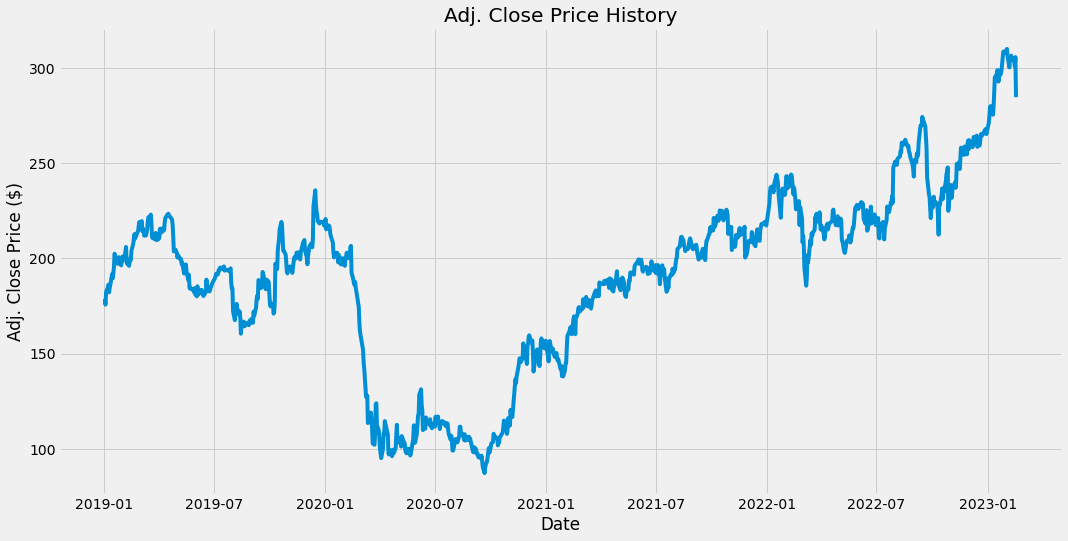

In [77]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price ($)')
plt.show()

In [78]:
# Get difference in price from prev day
delta = df['Adj Close'].diff(1).dropna()
delta

Date
2019-01-03    -2.885513
2019-01-04     6.677933
2019-01-07     2.308426
2019-01-08     1.484055
2019-01-09    -4.039749
                ...    
2023-02-13    -0.700012
2023-02-14     1.200012
2023-02-15    -4.200012
2023-02-16     4.800018
2023-02-17   -21.000000
Name: Adj Close, Length: 1043, dtype: float64

In [79]:
# Get positive gains and negative gains
up = delta.copy()
up[up<0] = 0
down = delta.copy()
down[down>0] = 0

In [80]:
# Get time period
period = 14

# Calc ave gain and loss in period
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

In [81]:
# Calc RSI

# Calc RS
rs = avg_gain/avg_loss
rsi = 100 - (100/(1+rs))

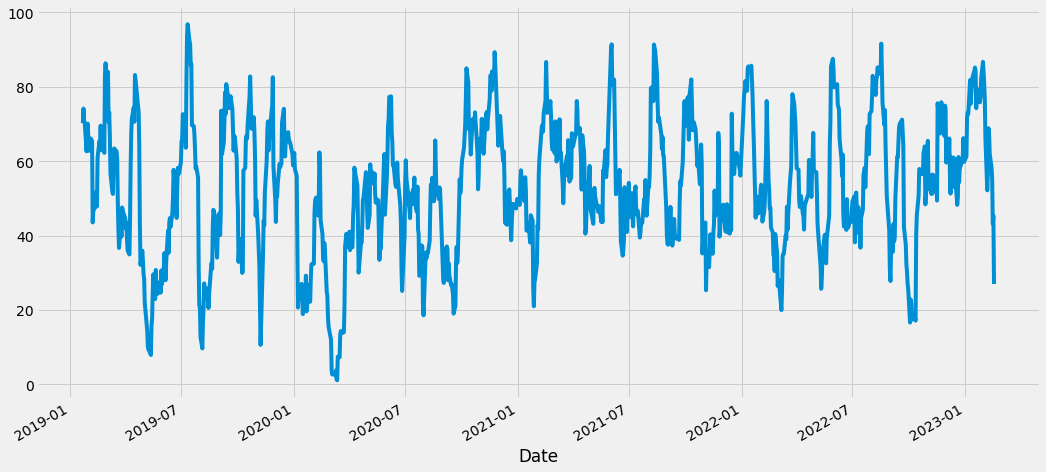

In [82]:
plt.figure(figsize=(16,8))
rsi.plot()
plt.show()

In [83]:
# Join RSI data with Adj Close

new_df = pd.DataFrame()
new_df['Adj Close'] = df['Adj Close']
new_df['RSI'] = rsi
new_df

,Adj Close,RSI
Date,,
2019-01-02,178.574127,NaN
2019-01-03,175.688614,NaN
2019-01-04,182.366547,NaN
2019-01-07,184.674973,NaN
2019-01-08,186.159027,NaN
...,...,...
2023-02-13,303.799988,58.252397
2023-02-14,305.000000,55.208336
2023-02-15,300.799988,43.189360


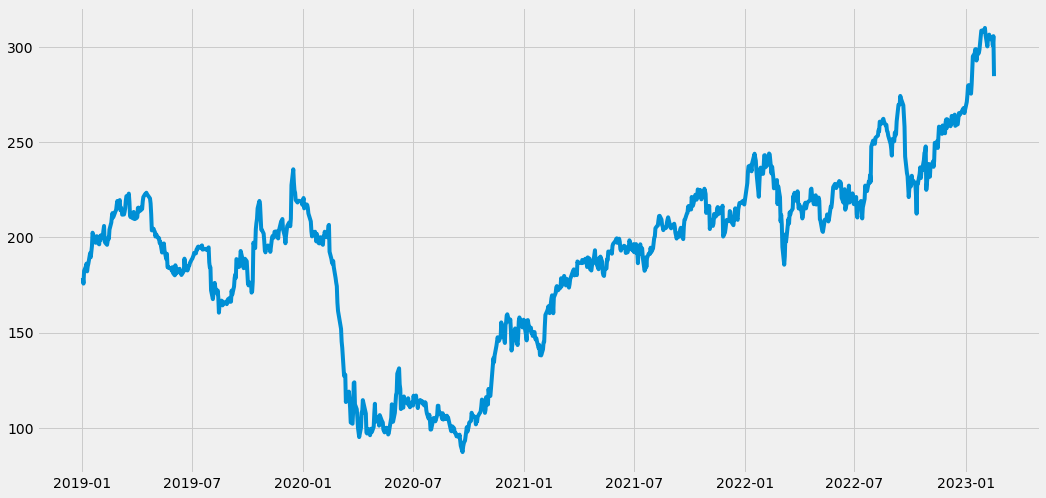

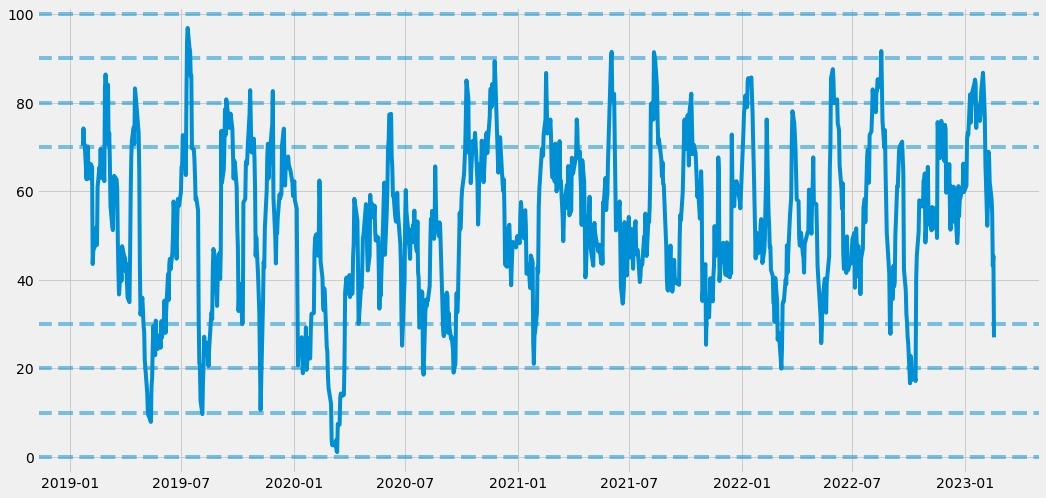

In [84]:
plt.figure(figsize=(16,8))
plt.plot(new_df.index, new_df['Adj Close'])

plt.figure(figsize=(16,8))
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha = 0.5)
plt.axhline(10, linestyle='--', alpha = 0.5)
plt.axhline(20, linestyle='--', alpha = 0.5)
plt.axhline(30, linestyle='--', alpha = 0.5)
plt.axhline(70, linestyle='--', alpha = 0.5)
plt.axhline(80, linestyle='--', alpha = 0.5)
plt.axhline(90, linestyle='--', alpha = 0.5)
plt.axhline(100, linestyle='--', alpha = 0.5)
